<a href="https://colab.research.google.com/github/ivan-block/Second-Hand-Cars-Regression/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [117]:
df = pd.read_csv('train.csv')

df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [118]:
df.shape

(1000, 12)

In [119]:
tensor_data = tf.constant(df)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [120]:
#tensor_data = tf.random.shuffle(df)
#print(tensor_data[:5])

In [121]:
X = tensor_data[:,3:-1]
X.shape

y = tensor_data[:,-1]
y.shape


TensorShape([1000])

In [122]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATA_SET = len(X)

In [123]:
X_train = X[:int(TRAIN_RATIO*DATA_SET)]
y_train = y[:int(TRAIN_RATIO*DATA_SET)]

print(X_train.shape)
print(y_train.shape)

(800, 8)
(800,)


In [124]:
X_val = X[int(TRAIN_RATIO*DATA_SET):int((VAL_RATIO+TRAIN_RATIO)*DATA_SET)]
y_val = y[int(TRAIN_RATIO*DATA_SET):int((VAL_RATIO+TRAIN_RATIO)*DATA_SET)]

print(X_val.shape)
print(y_val.shape)

(100, 8)
(100,)


In [125]:
X_test = X[int((VAL_RATIO+TRAIN_RATIO)*DATA_SET):]
y_test = y[int((VAL_RATIO+TRAIN_RATIO)*DATA_SET):]

print(X_test.shape)
print(y_test.shape)

(100, 8)
(100,)


In [126]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.9117589 , -0.6980478 , -1.4046503 , -1.285972  ,  1.0915856 ,
         0.5131691 , -0.575506  ,  0.9342201 ],
       [ 0.83045536,  0.61544764,  1.3976445 ,  1.1964284 , -1.1406962 ,
        -0.98759097, -0.526438  , -0.38756672],
       [-1.492497  ,  1.1411203 , -0.70407665,  0.8417998 ,  1.5380421 ,
         0.7201705 , -1.5568652 , -0.29315338],
       [-0.33102083,  0.06105132,  0.6970708 , -0.93134344, -0.24778342,
         1.548176  , -1.5077972 ,  0.60377336],
       [ 0.83045536, -1.2946887 , -0.00350295,  1.1964284 ,  0.19867295,
        -0.3665868 , -1.5568652 ,  0.08449998]], dtype=float32)>

In [127]:
print(X[:5])

tf.Tensor(
[[3.00000e+00 7.89450e+04 1.00000e+00 2.00000e+00 1.40000e+01 1.77000e+02
  7.30000e+01 1.23000e+02]
 [6.00000e+00 1.17220e+05 5.00000e+00 9.00000e+00 9.00000e+00 1.48000e+02
  7.40000e+01 9.50000e+01]
 [2.00000e+00 1.32538e+05 2.00000e+00 8.00000e+00 1.50000e+01 1.81000e+02
  5.30000e+01 9.70000e+01]
 [4.00000e+00 1.01065e+05 4.00000e+00 3.00000e+00 1.10000e+01 1.97000e+02
  5.40000e+01 1.16000e+02]
 [6.00000e+00 6.15590e+04 3.00000e+00 9.00000e+00 1.20000e+01 1.60000e+02
  5.30000e+01 1.05000e+02]], shape=(5, 8), dtype=float64)


In [128]:
model = tf.keras.Sequential ([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation= 'relu'),
    Dense(128, activation= 'relu'),
    Dense(128, activation= 'relu'),
    Dense(1)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

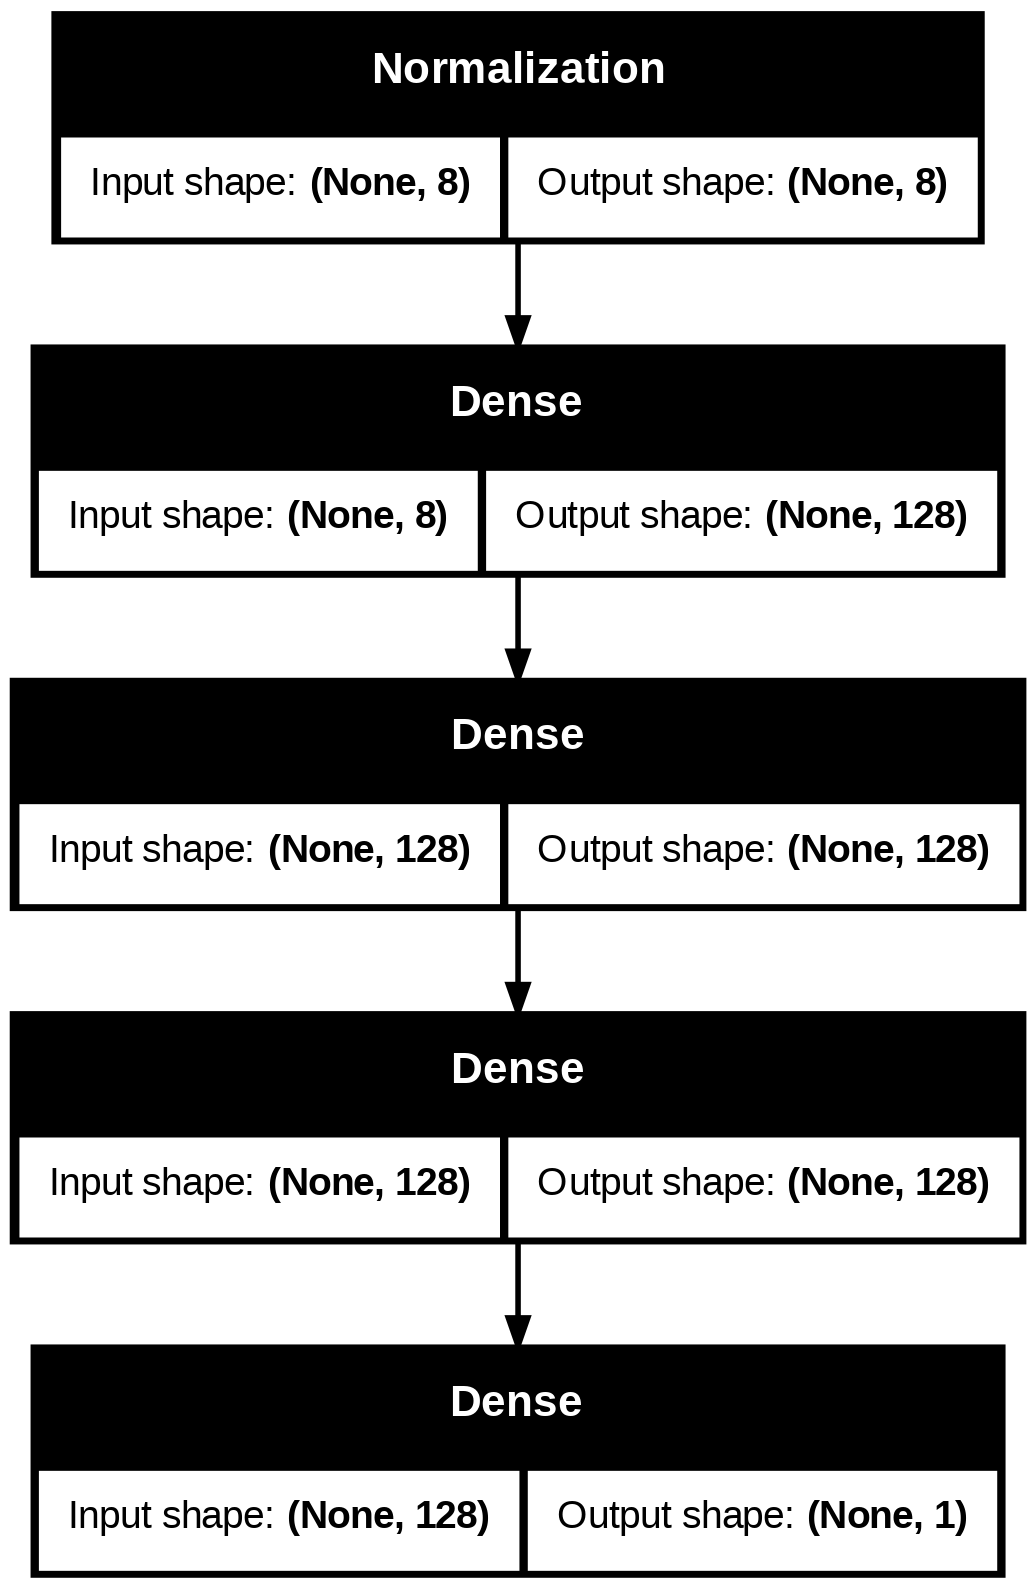

In [129]:
model.build()
tf.keras.utils.plot_model(model, to_file='models.png', show_shapes=True)

In [130]:
model.compile(optimizer = Adam(learning_rate= 0.1),
    loss = MeanAbsoluteError(),
    metrics = [RootMeanSquaredError()])

In [131]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 237117.5312 - root_mean_squared_error: 273731.0938 - val_loss: 64824.2188 - val_root_mean_squared_error: 79978.2266
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61814.6562 - root_mean_squared_error: 78298.9219 - val_loss: 45416.3359 - val_root_mean_squared_error: 57272.8711
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49031.9336 - root_mean_squared_error: 61794.4531 - val_loss: 52174.5742 - val_root_mean_squared_error: 66914.1406
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51161.3711 - root_mean_squared_error: 64142.1133 - val_loss: 40715.7812 - val_root_mean_squared_error: 51556.8438
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40669.2812 - root_mean_squared_error: 50999.7656 - val_loss: 45707.2852 - val_root_mean_squared_error: 55124.9102
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42872.1758 - root_mean_squared_error: 54325.1992 - val_loss: 45731.3867 -

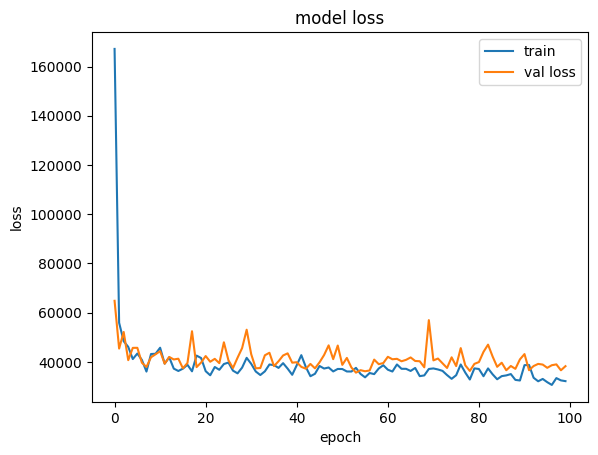

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train', 'val loss'])
plt.show()

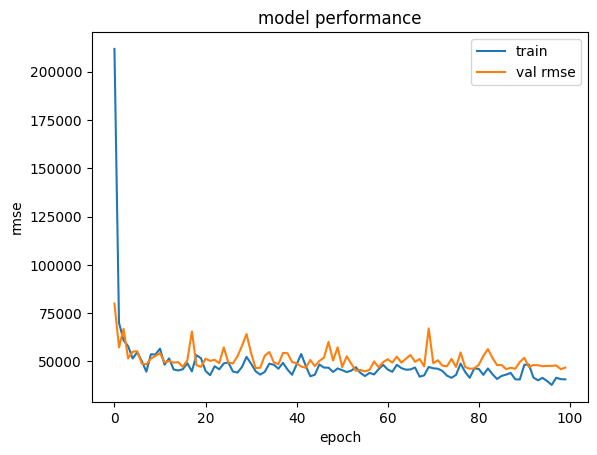

In [133]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.title('model performance')
plt.legend(['train', 'val rmse'])
plt.show()

In [134]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38215.6875 - root_mean_squared_error: 47490.2773 


[37305.59375, 46722.421875]

In [135]:
X_test.shape

TensorShape([100, 8])

In [136]:
model.predict(tf.expand_dims(X_test[0], axis = 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[133593.02]], dtype=float32)

In [137]:
y_test[0]

<tf.Tensor: shape=(), dtype=float64, numpy=191566.0>

In [138]:
y_true = list(y_test.numpy())

In [139]:
y_pred = list(model.predict(X_test)[:,0])

print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[np.float32(133593.02), np.float32(438359.5), np.float32(256445.81), np.float32(153345.14), np.float32(164235.19), np.float32(331871.38), np.float32(199183.52), np.float32(348645.22), np.float32(430191.2), np.float32(423491.97), np.float32(440006.16), np.float32(211315.06), np.float32(263673.0), np.float32(174266.53), np.float32(430220.88), np.float32(290740.44), np.float32(263780.72), np.float32(423343.75), np.float32(337124.88), np.float32(312303.7), np.float32(246151.1), np.float32(386819.62), np.float32(172655.55), np.float32(156053.38), np.float32(465629.38), np.float32(380174.44), np.float32(323940.4), np.float32(246771.19), np.float32(343477.7), np.float32(229661.27), np.float32(265707.62), np.float32(138392.75), np.float32(300440.5), np.float32(187427.5), np.float32(108111.734), np.float32(438443.84), np.float32(207898.34), np.float32(354861.34), np.float32(523765.38), np.float32(341048.0), np.float32(451326.0), np.float32(121030.48), np.fl

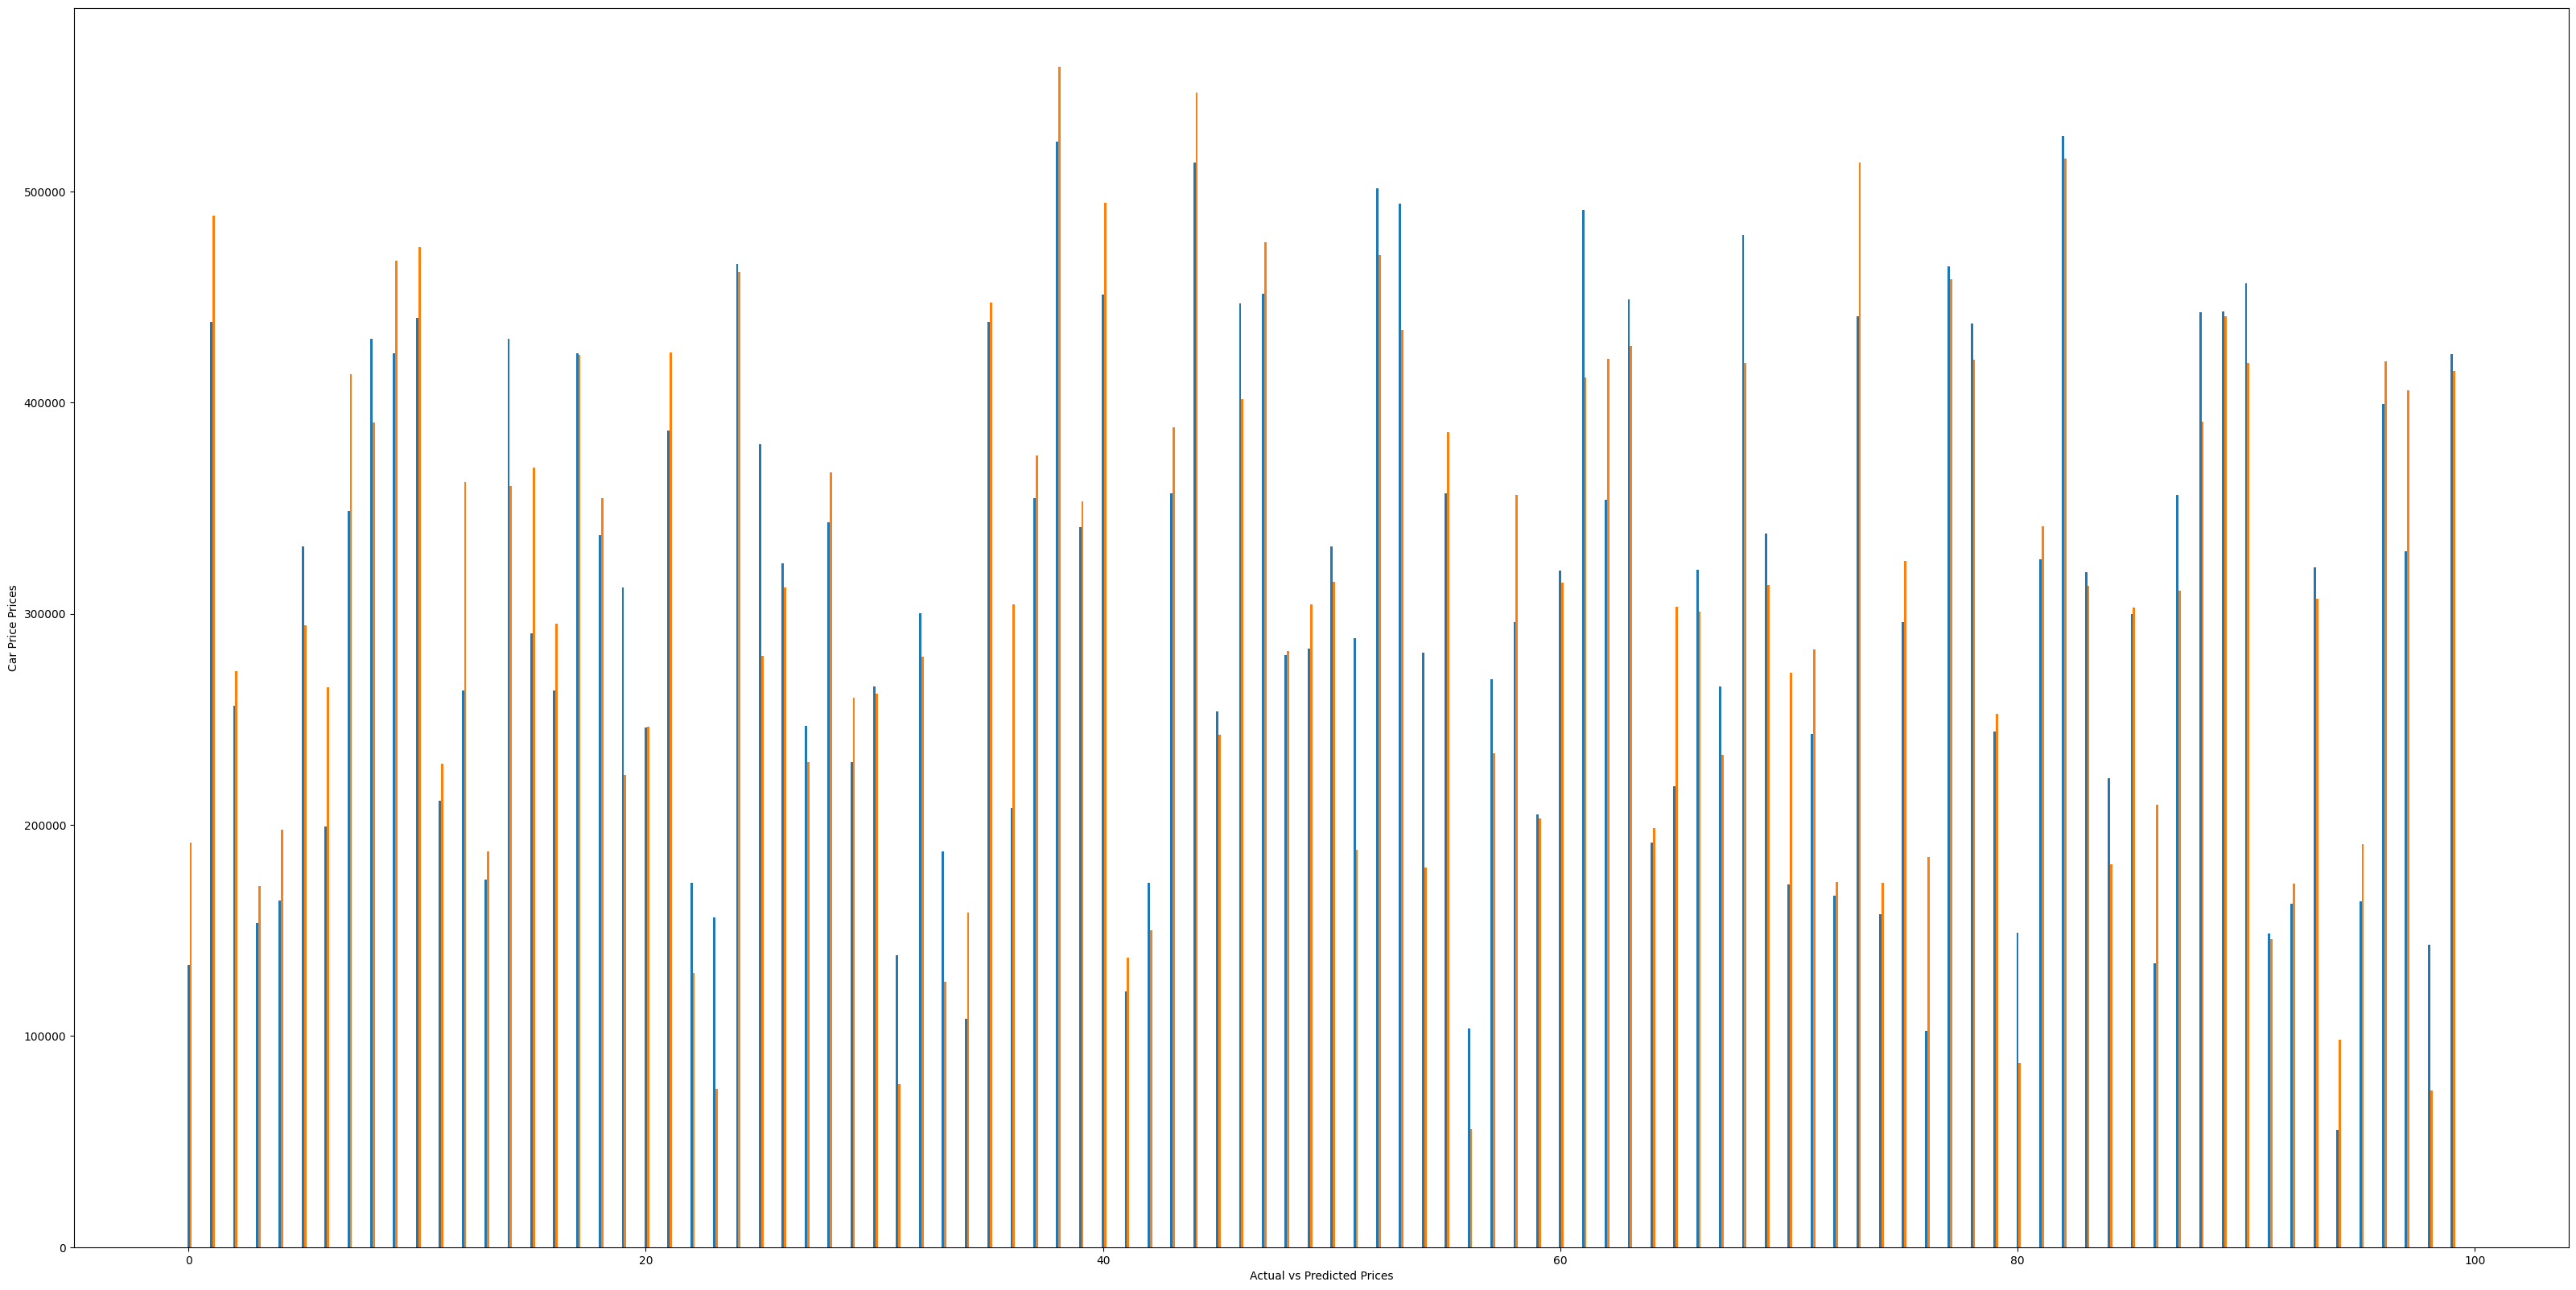

In [141]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label = 'Predicted Car Price')
plt.bar(ind + width, y_true, width, label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()